# Análisis exploratorio tronadura

*nota: Sabemos que el resultado final de la tronadura corresponde al campo p80*

In [1]:
#Librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
#Carga de datos
df = pd.read_excel('BaseDatosHistorica_Tronadura_Hackathon.xlsx',skiprows=2)
df.columns

Index(['Fase', 'Banco', 'Tipo de tronadura', 'Tipo Material', 'M',
       'Dominio Estructural', 'Diámetro', 'BxS', 'Tiempo entre Pozos Filas ms',
       'Fc', 'Tipo Explosivo', 'P10', 'P20', 'P30', 'P40', 'P50', 'P60', 'P70',
       'P80', 'P90', 'P100', 'Este', 'Norte', 'Cota'],
      dtype='object')

## Calidad del input

El dataset origial presenta 42 filas con todos sus campos missing, de modo que lo primero será eliminar estas filas

In [30]:
print('Registros missing')
print( df.isna().sum())

Registros missing
Fase                           42
Banco                          42
Tipo de tronadura              42
Tipo Material                  42
M                              42
Dominio Estructural            42
Diámetro                       42
BxS                            42
Tiempo entre Pozos Filas ms    43
Fc                             42
Tipo Explosivo                 42
P10                            42
P20                            42
P30                            42
P40                            42
P50                            42
P60                            42
P70                            42
P80                            42
P90                            42
P100                           42
Este                           47
Norte                          47
Cota                           47
dtype: int64


In [4]:
#Eliminacion missing
df = df.dropna()

## Variables asociadas al diseño espacial de la mina 

- Fase: Sectorización de la mina
- Banco: Cota sobre el nivel del mar (altura)
- Tipo de Tronadura: Puede variar segun el proposito


**1.Fase:** Lo primero que se puede apreciar es que la mayoría de las tronaduras ocurren en el stage 4 y 2, además de que la frecuencia de los otros stage es casi despreciable. Por otro lado, si se revisa el patrón de comportamiento de P80 podemos observar a simple vista una distribución diferente según el stage, de modo que esta es una **variable primordial para ser incluida en un futuro modelo predictivo** 

Además, si bien la variable P80 por si misma aparenta ser homogénea y no presenta valores atípicos, al agregar la apertura por Stage si se pueden obsevar valores que salen de la norma, eventualmete puede ser buena idea eliminar estos registros.

Text(0.5, 1.0, 'Disperción de P80 por tipo de fase')

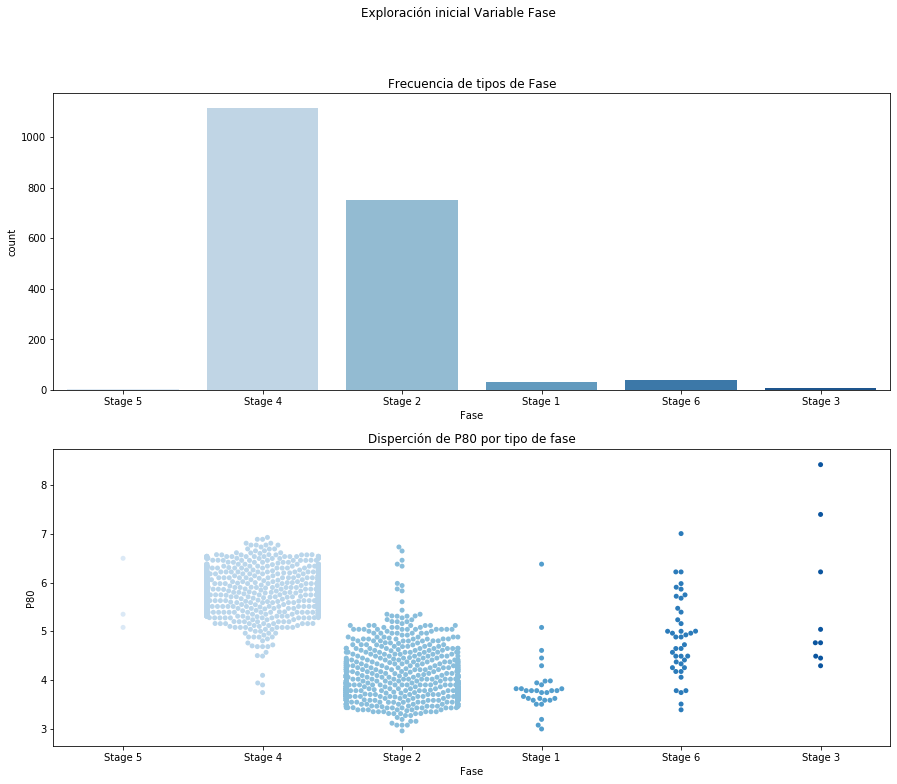

In [35]:

fig = plt.figure(figsize=(15,12))
fig.suptitle("Exploración inicial Variable Fase")


gs = GridSpec(2,1)


fig.add_subplot(gs[0, 0])
sns.countplot(data=df,x='Fase',palette='Blues')
plt.title('Frecuencia de tipos de Fase')

fig.add_subplot(gs[1, 0])
sns.swarmplot(data=df,x='Fase',y='P80',palette='Blues')
plt.title('Disperción de P80 por tipo de fase')

**2.Banco:** Como esta variable es una componente geográfica de altura es esperable que no tenga mucha variación. En efecto, al revisar su boxplot nos encontramos que no presenta valores atípicos ni gran disperción. Por otro lado, la mayoría de las tronaduras se concentran en dos peaks diferentes (uno cerca de los 2900 y otro cerca de los 3400). 

Al comparar el comportamiento de P80 respecto al Banco se observan 2 patrones diferentes lo que nos puede llevar a pensar que es una variable relevante al modelo. Sin embargo, si se revisa la distribución de banco por *fase* se puede notar que cada stage tiene un comportamiento de Banco diferente. De modo que los patrones diferentes en la variable P80 son heredaros por el stage, es decir, **ambas columnas entregan información en cierta forma redundante**.



Text(0.5, 1.0, 'Banco en relación a Fase')

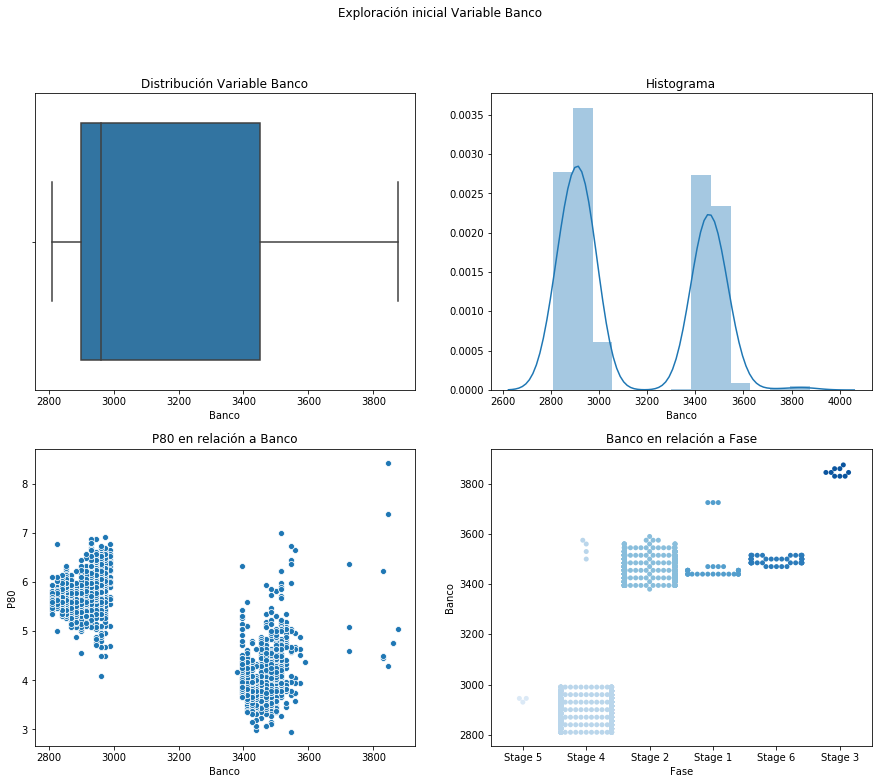

In [5]:
fig = plt.figure(figsize=(15,12))
fig.suptitle("Exploración inicial Variable Banco")


gs = GridSpec(2,2)


fig.add_subplot(gs[0, 0])
sns.boxplot(data=df,x='Banco')
plt.title("Distribución Variable Banco")

fig.add_subplot(gs[0,1])
sns.distplot(df['Banco'])
plt.title('Histograma')

fig.add_subplot(gs[1,0])
sns.scatterplot(data=df,x='Banco',y='P80')
plt.title('P80 en relación a Banco')

fig.add_subplot(gs[1,1])
sns.swarmplot(data=df,y='Banco',x='Fase',palette='Blues')
plt.title('Banco en relación a Fase')

**3.Tipo de Tronadura:** La tronadura que con mayor frecuencia se usa es el tipo 2 (aprox el 88% de los registros son tronadura tipo2).Como es de esperarse, dado que son tipos diferentes existe un comportamiento de P80 diferente. 

Teniendo en consideración la diferencia de frecuencias entre los tipos de tronadura, se vuelve interesante revisar si esta distribución se mantiene al abrir por Fase. Sin embargo, se puede ovservar que las tronadura 1 suele darse en el Stage 4.

Al revisar la variable P80 considerando el tipo de tronadura y la fase se encuentra que las tronadura 1 puede tener valores muy altos o muy bajos de P80 para el stage 4. Esta diferencia no ocurre en ningún otro Stage. Finalmente, esta perspectiva es útil para revisar en detalle valores de P80 atípicos que antes no se observaban a simple vista

Text(0.5, 1.0, 'Distribución de P80 por Fase y tipo de tronadura')

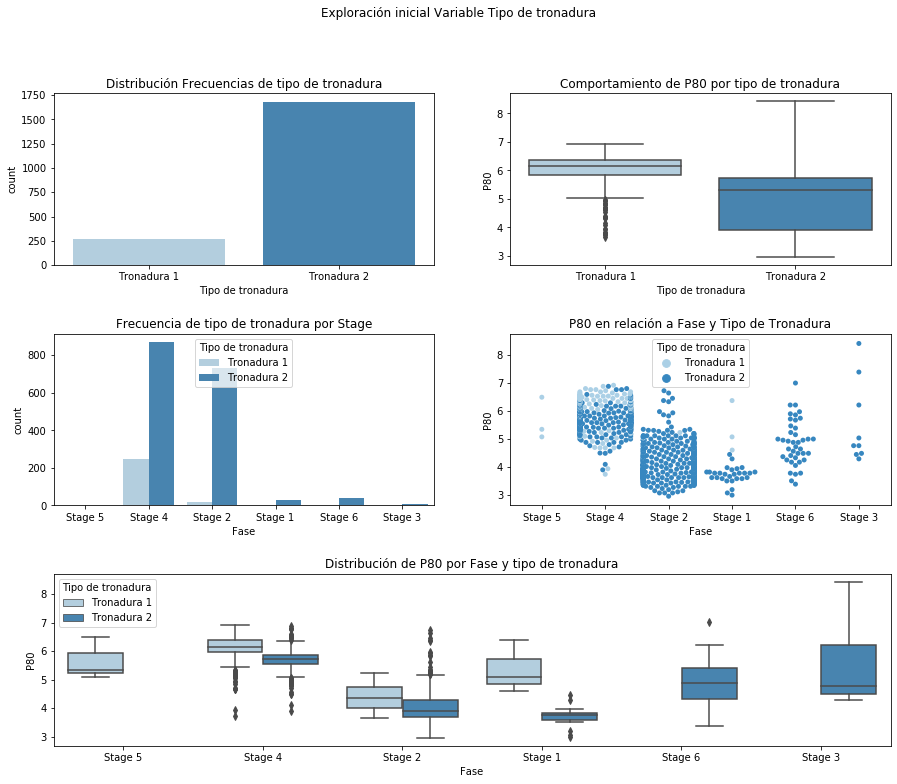

In [57]:
fig = plt.figure(figsize=(15,12))
fig.suptitle("Exploración inicial Variable Tipo de tronadura")

gs = GridSpec(3,2,wspace=0.2,hspace=0.4)

fig.add_subplot(gs[0, 0])
sns.countplot(data=df,x='Tipo de tronadura',palette='Blues')
plt.title("Distribución Frecuencias de tipo de tronadura")

fig.add_subplot(gs[0,1])
sns.boxplot(data=df,x='Tipo de tronadura', y='P80',palette='Blues')
plt.title('Comportamiento de P80 por tipo de tronadura')

fig.add_subplot(gs[1,0])
sns.countplot(data=df,hue='Tipo de tronadura',palette='Blues',x='Fase')
plt.title('Frecuencia de tipo de tronadura por Stage')

fig.add_subplot(gs[1,1])
sns.swarmplot(x="Fase", y="P80", hue="Tipo de tronadura",data=df,palette='Blues')
plt.title('P80 en relación a Fase y Tipo de Tronadura')

fig.add_subplot(gs[2,:])
sns.boxplot(data=df,x='Fase',y='P80',hue='Tipo de tronadura',palette='Blues')
plt.title('Distribución de P80 por Fase y tipo de tronadura')

#### Principales conclusiones
 1. Fase es una variable escencial para encontrar patrones de comportamiento en las tronaduras
 2. Banco si bien podría ser útil, es una variable de la que podría prescindirse
 3. El tipo de tronadura junto con el stage permite crear un primer criterio de limpieza de datos
